# Applying Clustering And NLP Technique

In [225]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [226]:
# !pip install spacy

In [227]:
!pip install contractions


In [228]:
# !python -m spacy download en_core_web_sm

In [229]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
nltk.download('punkt')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [230]:
df_review=pd.read_csv('/content/drive/My Drive/FatimaQurban_ML&DL_BytewiseFellowship2024/FatimaQurban_ML&DL_BWF_GooglePlayStoreReview/reviews.csv')
df_review.sample(10, random_state=42)
# df.head()

,content,score
1766,It's very easy to add tasks with its incredibl...,5
9813,"Absolutely useless, worked once then never aga...",1
4921,I bought premium and now I can't login to the ...,1
4959,"Yo, fix the widget",2
9798,Useless app... Niether Reminder nor notificati...,1
2754,"This app is Very Awesome, always keeps me on t...",5
2858,Didn't feel like a game,1
5563,Great habit tracker,5
11355,I love the variety of settings and options,5
5773,Very useful but completely loses it's value wh...,2


# Data Preprocessing

## Finding the number of null values and general info regarding our data

In [231]:
df_review.isnull().sum()

content    0
score      0
dtype: int64

In [232]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12495 entries, 0 to 12494
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  12495 non-null  object
 1   score    12495 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 195.4+ KB


## Creating a seperate column 'Negetive reviews for the the seperating the negetive reviews from the positive ones

In [233]:
df_review['Negetive Review']= ((df_review['score'] ==1) | (df_review['score'] ==2)).astype(int)
df_review.head()

,content,score,Negetive Review
0,I cannot open the app anymore,1,1
1,I have been begging for a refund from this app...,1,1
2,Very costly for the premium version (approx In...,1,1
3,"Used to keep me organized, but all the 2020 UP...",1,1
4,Dan Birthday Oct 28,1,1


In [234]:
# Filter only negative reviews
preprocessed_reviews = df_review[df_review['Negetive Review'] == 1].copy()

## Lowering the alphabets

The str accessor in pandas is a powerful tool that allows you to apply string methods element-wise to a pandas Series. When you use str with a Series, you can perform operations on each element as if they were individual strings.

In [235]:
preprocessed_reviews['content']= preprocessed_reviews['content'].str.lower()
preprocessed_reviews.drop(columns=['Negetive Review'], inplace=True)
preprocessed_reviews.head()

,content,score
0,i cannot open the app anymore,1
1,i have been begging for a refund from this app...,1
2,very costly for the premium version (approx in...,1
3,"used to keep me organized, but all the 2020 up...",1
4,dan birthday oct 28,1


# Tokenization

### Technique No. 1:
for very basic tokenization we use **split()**

In [236]:
# df['token_split']=df['content'].str.split()
# df.head()

### Technique No. 2:
 for better tokenization we use **nltk** and **regex** to handle the punctuations in the text

In [237]:
!pip install emoji

In [238]:
from nltk.tokenize import word_tokenize
import contractions
import string
import emoji

# Function to remove punctuation
def remove_punctuation(tokens):
    return [word for word in tokens if word not in string.punctuation]

def expand_contractions(text):
    return contractions.fix(text)

preprocessed_reviews['content'] = preprocessed_reviews['content'].apply(emoji.demojize)
preprocessed_reviews['content'] = preprocessed_reviews['content'].apply(expand_contractions)

preprocessed_reviews['tokens_nltk'] = preprocessed_reviews['content'].apply(word_tokenize)
preprocessed_reviews['tokens_nltk'] = preprocessed_reviews['tokens_nltk'].apply(remove_punctuation)

preprocessed_reviews.sample(10)

,content,score,tokens_nltk
5042,"i like that it allows specific habits, i do no...",2,"[i, like, that, it, allows, specific, habits, ..."
225,app should not enforce sign in for use. uninst...,2,"[app, should, not, enforce, sign, in, for, use..."
7030,need improve 1. add the option to use gmail fo...,2,"[need, improve, 1., add, the, option, to, use,..."
8766,i really did not understand the interface and ...,1,"[i, really, did, not, understand, the, interfa..."
1989,"i found ticktick not satisfy me, failed to giv...",1,"[i, found, ticktick, not, satisfy, me, failed,..."
7036,this app only notifies me of one reminder at a...,2,"[this, app, only, notifies, me, of, one, remin..."
10847,"the app itself is great, but they have started...",2,"[the, app, itself, is, great, but, they, have,..."
8775,very confusing,1,"[very, confusing]"
11792,it is just a skin for google calendar.,2,"[it, is, just, a, skin, for, google, calendar]"
3225,yeah.. too many bugs.,2,"[yeah, .., too, many, bugs]"


### Technique No. 3
Using spacy Lib is another good approach for tokenization

In [239]:
# import spacy
# nlp = spacy.load('en_core_web_sm')
# df['tokens_spacy'] = df['content'].apply(lambda x: [token.text for token in nlp(x)])
# df.head()

## Removing Stop Words

stopwords are the words are like in Articles: a, an, the.Conjunctions: and, but, or. Prepositions: in, on, at, with. Pronouns: he, she, it, they. Common verbs: is, am, are, was, were, be, being, been.

In [240]:
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [241]:


def remove_stop_words(tokens):
    new_text = []
    for word in tokens:
        if word not in stopwords.words('english'):
          new_text.append(word)
    return " ".join(new_text)


# def remove_stop_words(tokens):
#     return [word for word in tokens if word not in stopwords.words('english')]

In [242]:
preprocessed_reviews['tokens_nltk']= preprocessed_reviews['tokens_nltk'].apply(remove_stop_words)


In [243]:
preprocessed_reviews.sample(10)

,content,score,tokens_nltk
7076,what is annoying about this app is a fact that...,2,annoying app fact android w10 web app differen...
10942,why is it so fiddly to get items to abutt next...,2,fiddly get items abutt next end entering time ...
3036,"this seems like a fun idea, and was recommende...",1,seems like fun idea recommended especially hel...
9977,would like to assign priority rating to each t...,2,would like assign priority rating task a=do so...
8936,i was recommended this app by a friend who lov...,2,recommended app friend loves got premium versi...
3914,"disappointing, every tree that i wanted is in ...",1,disappointing every tree wanted pro version us...
11601,would not let me make an regular account witho...,1,would let make regular account without linking...
59,"i should have looked through ""most recent"" ins...",1,looked `` recent '' instead `` relevant '' rev...
345,cannot really set custom remindere. for exampl...,2,really set custom remindere example need able ...
11632,i hate it:angry_face:,1,hate angry_face


# TF-IDF
Tf-idf technique is used for vectorization of the dictionary or each review.

Other techniques like;

*  **Bag of words** we **CountVectorizer**
*  **One-hot Encoding** are also used for vectorization


---



***Why do we use vectorization?***
---
We do vectorization to convert each token into number whih can furthur be processed by Machine more easily.



#Mathematical Intuation of TF- IDF:

If a word is there in a single corpus/review/document many times but is very less in the other documents.

It assigns weightage to each word in a document. Assign higher weightage to the word which is more in a particular document than in the entire corpus.


---

# FORMULAS


**T.F(term, doc)= (No of  term occurring the document)/ (total no. of terms in the document)**
always lie b/w 0 and 1

**IDF(term)=lge (total no. of documents in the corpus) /(no of document with term t in them)** lg e is base 10


---


### Term frequent in the corpus → lesser idf (if a word is in all doc its idf is 0)

### Term less frequent in the corpus → higher idf (if a term is 1/200

# Tf-idf= Tf * idf


In [244]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(stop_words='english') # although i tired only making english vector but its still giving other languages
tfidf_matrix = tfidf.fit_transform(preprocessed_reviews['content']).toarray()
print(tfidf_matrix)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [245]:
print(tfidf.get_feature_names_out()) # although i tired only making english vector but its still giving other languages

['00' '000' '00am' ... 'হর' '在app内付费了两次' '没有升级到pro版本']


# Implementing KNN- Algorithm

In [246]:
from sklearn.cluster import KMeans

applying **ELBOW METHOD** to find the best K value for good accuracy.

**K++ means** is used to assign far random k centeroid to avoid  ***Random initialization trap.***

Tried applying the elbow mwthod to find K

In [247]:
# wcss=[]
# for k in range(2,21):
#   kmeans=KMeans(n_clusters=k,init="k-means++") #n_clusters and init bother are hyperparameters .
#   kmeans.fit(tfidf_matrix)
#   wcss.append(kmeans.inertia_)

In [248]:
# wcss

In [249]:
# plt.plot(range(2,21),wcss)
# plt.xticks(range(2,21))
# plt.xlabel("number of cluster")
# plt.ylabel("WCSS")
# plt.show()

In [250]:
terms = pd.DataFrame(tfidf_matrix, columns=tfidf.get_feature_names_out())
print(terms.sum().sort_values(ascending=False).head(20))

# Check the shape of the TF-IDF matrix
print("TF-IDF Matrix Shape:", tfidf_matrix.shape)

# Inspect a sample of the tokenized reviews
print(preprocessed_reviews['tokens_nltk'].head())

app          260.549595
does         119.524577
use          101.691423
good          96.986959
work          92.474601
time          89.009268
calendar      88.483688
version       86.046542
just          85.534899
premium       82.624773
like          80.083722
tasks         79.624280
sync          70.708557
free          67.722166
task          62.849026
account       61.308020
update        60.897063
working       59.258689
reminders     57.878144
really        57.383655
dtype: float64
TF-IDF Matrix Shape: (4850, 7296)
0                                     open app anymore
1             begging refund app month nobody replying
2    costly premium version approx indian rupees 91...
3    used keep organized 2020 updates made mess thi...
4                                  dan birthday oct 28
Name: tokens_nltk, dtype: object


In [251]:
k_means = KMeans(n_clusters=5, random_state=42)
pred_labels = k_means.fit_predict(tfidf_matrix)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [252]:
categories = pred_labels.tolist()
preprocessed_reviews["category"] = categories
preprocessed_reviews.sample(10, random_state=43)

,content,score,tokens_nltk,category
9614,"if this was free, yeah i would totally use thi...",1,free yeah would totally use honestly wants pay...,3
3990,it does not guide me back when i leave the app,1,guide back leave app,1
3054,i liked doing my tasks until they kicked me ou...,2,liked tasks kicked reason crying_face,2
1219,it was already very irritating to see your lat...,2,already irritating see latest added tasks push...,2
9816,it is given reminders,1,given reminders,2
8078,the widget does not update with the system tim...,2,widget update system time often stuck interact...,2
10934,would be great but almost everything you need ...,2,would great almost everything need customize f...,3
5770,complicated interface. adding a repeating task...,2,complicated interface adding repeating task sp...,2
9605,"i cannot pay for it?? it says ""platform error""...",1,pay says `` platform error '' something `` iap...,3
3157,"have been a user for years, but the app is bor...",2,user years app borderline unusable point savin...,2


# Finding the frequent terms in each cluster

In [253]:
terms = tfidf.get_feature_names_out()

# List to save the top term for each cluster
topic_terms_list = []

for cluster in range(k_means.n_clusters):

    # Get indices of reviews in the current cluster as enumerate returns the index as well as value
    cluster_indices = [i for i, label in enumerate(pred_labels) if label == cluster]

    #This line sums the TF-IDF scores for each term across all reviews in the current cluster.
    # The result is a single vector (cluster_tfidf_sum) where each element represents the total TF-IDF score for a term in the cluster.
    cluster_tfidf_sum = tfidf_matrix[cluster_indices].sum(axis=0)

    #This converts the summed TF-IDF scores from a matrix to a flattened (1D) NumPy array
    cluster_term_freq = np.asarray(cluster_tfidf_sum).ravel()

    # Get the top term for each of the cluster and its frequencies
    top_term_index = cluster_term_freq.argsort()[::-1][0]

    # Append rows to the topic_terms DataFrame with three fields:
    # - category: label / cluster assigned from K-means
    # - term: the identified top term
    # - frequency: term's weight for the category

    topic_terms_list.append(
        {
            "category": cluster,
            "term": terms[top_term_index],
            "frequency": cluster_term_freq[top_term_index],
        }
    )

# Pandas DataFrame to store results from this step
topic_terms = pd.DataFrame(topic_terms_list)

# Output the final result
print(topic_terms)


   category           term   frequency
0         0  notifications   38.566396
1         1           does   81.398832
2         2            app  185.848244
3         3        version   72.663606
4         4           good   39.141445


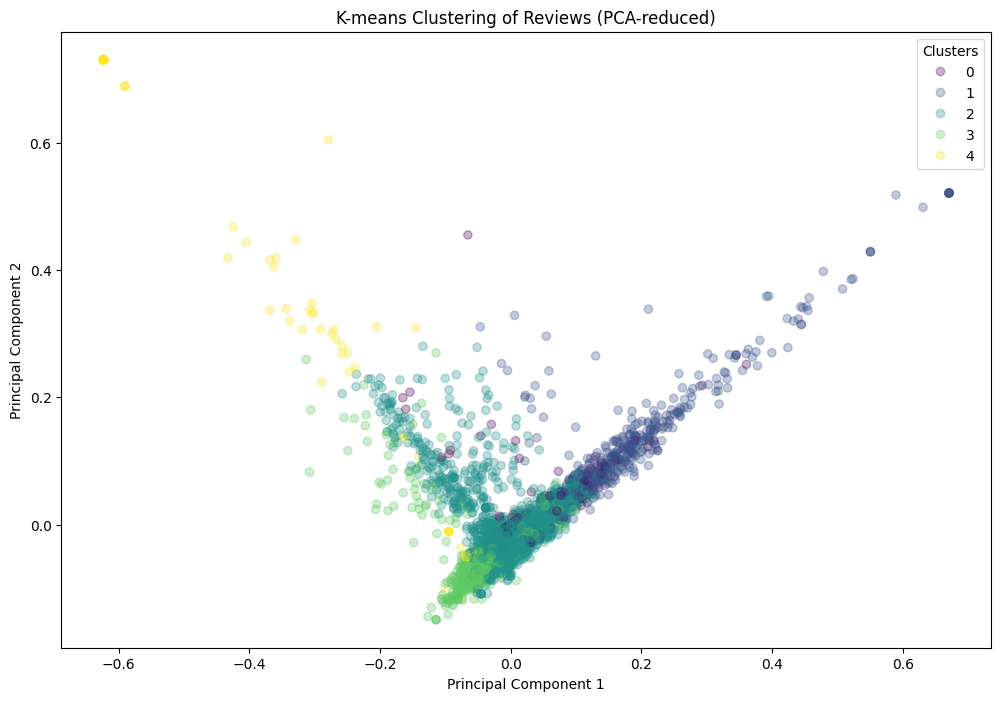

In [254]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce the TF-IDF matrix to 2 dimensions using PCA
pca = PCA(n_components=2)
reduced_tfidf = pca.fit_transform(tfidf_matrix)

# Create a DataFrame for the reduced data and include the cluster labels
pca_df = pd.DataFrame(reduced_tfidf, columns=['PC1', 'PC2'])
pca_df['cluster'] = pred_labels

# Plotting the clusters
plt.figure(figsize=(12, 8))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['cluster'], cmap='viridis', alpha=0.3)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering of Reviews (PCA-reduced)')
plt.legend(*scatter.legend_elements(), title='Clusters')
plt.show()
